In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATOS

In [2]:
peliculas = pd.read_csv('./Dataset/Peliculas_plataforma.csv', sep=';')
peliculas

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Plataforma
0,1,Inception,2010,13,8.8,87 %,1,0,0,0,0,Christopher Nolan,Action,United States,English,148.0,Netflix
1,2,The Matrix,1999,18,8.7,87 %,1,0,0,0,0,Lana Wachowski,Sci-Fi,United States,English,136.0,Netflix
2,3,Avengers: Infinity War,2018,13,8.5,84 %,1,0,0,0,0,Anthony Russo,Action,United States,English,149.0,Netflix
3,4,Back to the Future,1985,7,8.5,96 %,1,0,0,0,0,Robert Zemeckis,Adventure,United States,English,116.0,Netflix
4,5,The Good; the Bad and the Ugly,1966,18,8.8,97 %,1,0,1,0,0,Sergio Leone,Western,Italy,Italian,161.0,Prime Video
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,Comedy,United States,English,120.0,Disney+
16740,16741,The Poof Point,2001,7,4.7,NaN,0,0,0,1,0,Neal Israel,Comedy,United States,English,90.0,Disney+
16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN,Disney+
16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN,Disney+


In [3]:
peliculas.describe()

,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


DROPS

In [4]:
pelisdrop = peliculas.drop(columns=["Age","Netflix","Hulu","Prime Video","Disney+","Type","Directors","Country","Language","Runtime"])
pelisdrop

,ID,Title,Year,IMDb,Rotten Tomatoes,Genres,Plataforma
0,1,Inception,2010,8.8,87 %,Action,Netflix
1,2,The Matrix,1999,8.7,87 %,Sci-Fi,Netflix
2,3,Avengers: Infinity War,2018,8.5,84 %,Action,Netflix
3,4,Back to the Future,1985,8.5,96 %,Adventure,Netflix
4,5,The Good; the Bad and the Ugly,1966,8.8,97 %,Western,Prime Video
...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,6.2,NaN,Comedy,Disney+
16740,16741,The Poof Point,2001,4.7,NaN,Comedy,Disney+
16741,16742,Sharks of Lost Island,2013,5.7,NaN,Documentary,Disney+
16742,16743,Man Among Cheetahs,2017,6.6,NaN,Documentary,Disney+


In [5]:
pelisdrop["year"]=pd.to_datetime(pelisdrop["Year"], format='%Y', errors='ignore')
pelisdrop["year"]

0       2010-01-01
1       1999-01-01
2       2018-01-01
3       1985-01-01
4       1966-01-01
           ...    
16739   1980-01-01
16740   2001-01-01
16741   2013-01-01
16742   2017-01-01
16743   1950-01-01
Name: year, Length: 16744, dtype: datetime64[ns]

In [6]:
pelisdrop.index = pelisdrop["year"]
pelisdrop.head(5)

,ID,Title,Year,IMDb,Rotten Tomatoes,Genres,Plataforma,year
year,,,,,,,,
2010-01-01,1,Inception,2010,8.8,87 %,Action,Netflix,2010-01-01
1999-01-01,2,The Matrix,1999,8.7,87 %,Sci-Fi,Netflix,1999-01-01
2018-01-01,3,Avengers: Infinity War,2018,8.5,84 %,Action,Netflix,2018-01-01
1985-01-01,4,Back to the Future,1985,8.5,96 %,Adventure,Netflix,1985-01-01
1966-01-01,5,The Good; the Bad and the Ugly,1966,8.8,97 %,Western,Prime Video,1966-01-01


In [15]:
pelisdrop2=pelisdrop.groupby(['Year']).mean()
pelisdrop2

,ID,IMDb
Year,,
1902,4468.000000,8.200000
1912,8796.000000,5.700000
1913,10044.500000,5.150000
1915,8336.500000,5.550000
1916,4620.000000,7.800000
...,...,...
2016,6984.230514,5.813490
2017,6175.245539,5.913548
2018,5902.994553,5.874633


In [21]:
pelisdrop2=pelisdrop[['IMDb']]
pelisdrop2

,IMDb
year,
2010-01-01,8.8
1999-01-01,8.7
2018-01-01,8.5
1985-01-01,8.5
1966-01-01,8.8
...,...
1980-01-01,6.2
2001-01-01,4.7
2013-01-01,5.7


GRAFICAS

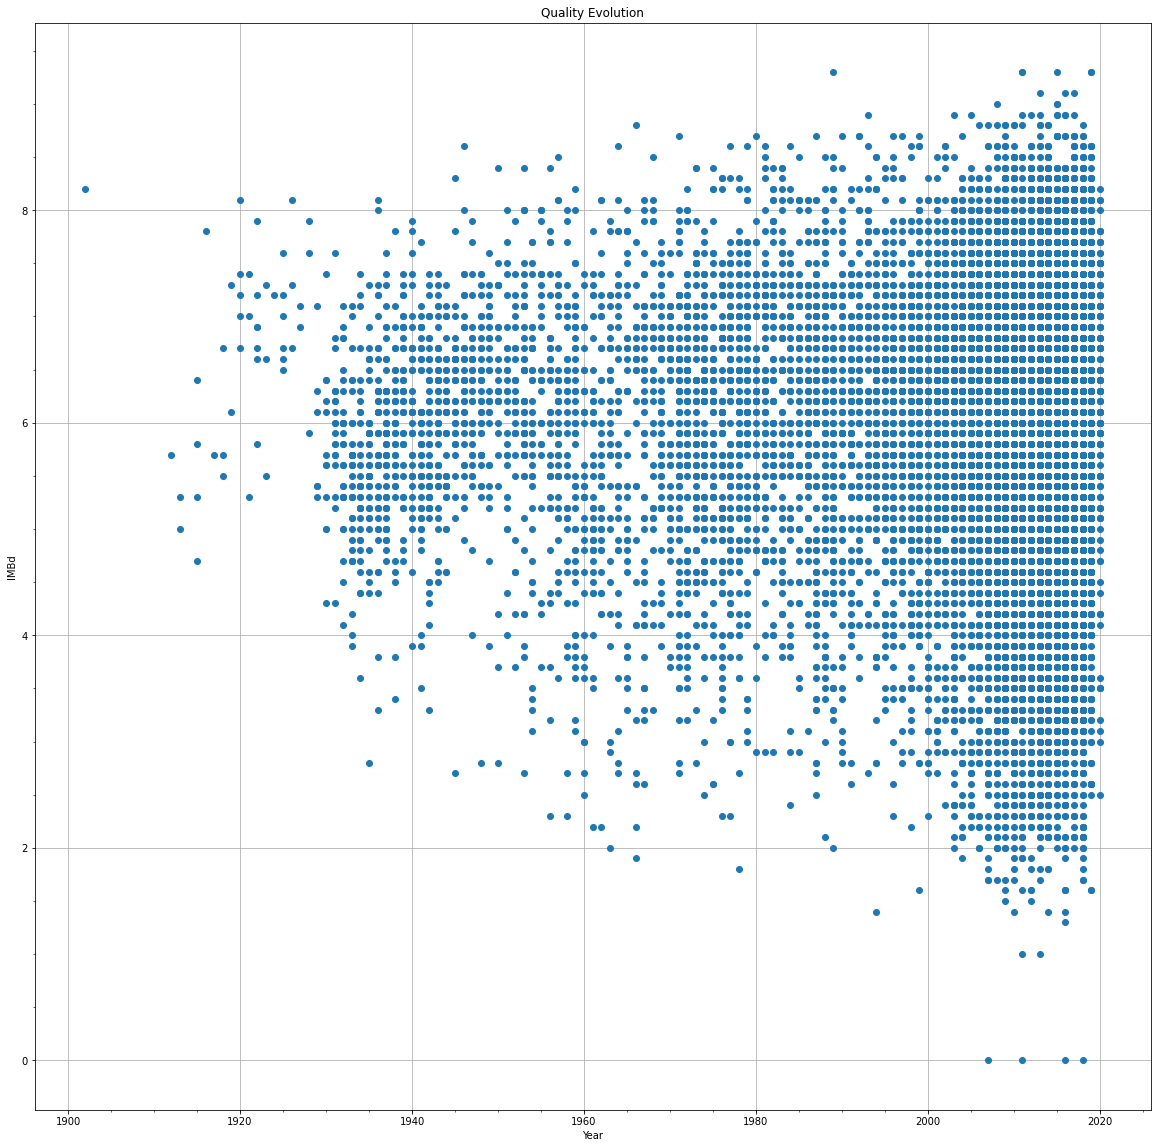

In [30]:
plt.figure(figsize=(20,20))
plt.grid()
plt.minorticks_on()
plt.plot(pelisdrop2, 'o')
plt.xlabel('Year') 
plt.ylabel('IMBd')
plt.title("Quality Evolution");

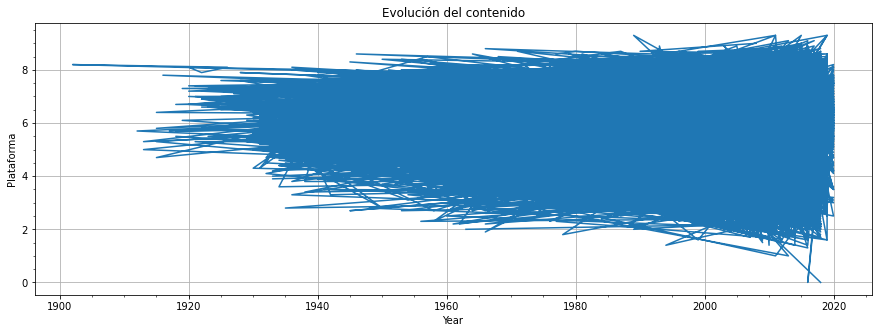

In [28]:
plt.figure(figsize=(15,5))
plt.grid()
plt.minorticks_on()
plt.plot(pelisdrop2)
plt.xlabel('Year') 
plt.ylabel('Plataforma')
plt.title("Evolución del contenido");